In [2]:
import numpy as np                           # Útil para procesos matemáticos 
from scipy.integrate import quad             # Útil para integrar numericamente
from scipy.optimize import fsolve            # Resuelve ecuaciónes numericamente
import matplotlib.pyplot as plt              # Plotting 

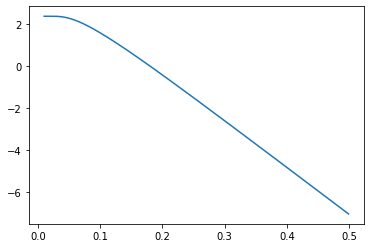

In [3]:
# Codigo que aproxima $sigma$ para opción call Europea
# Seteamos valores enunciado
s = 101.5
e = 100
delta_t = 1/3
r = 0.08
v = 6.51

# definimos funciones d's, N y valor
def d1(x): return (np.log(s/e)+(r+0.5*(x**2))*delta_t)/(x*np.sqrt(delta_t))
def d2(x): return (np.log(s/e)+(r-0.5*(x**2))*delta_t)/(x*np.sqrt(delta_t))
def integrand_N(x): return (1/np.sqrt(2*np.pi))*np.e**(-(x**2)/2)
def N(x): 
    integral,err = quad(integrand_N, -np.infty, x) 
    return integral
def value(x): 
    return s*N(d1(x))-e*N(d2(x))*np.e**(-r*delta_t)

# Ploteamos la función de diferencia para encontrar el punto donde es 0
def func(x):
    return v-value(x)

vfunc = np.vectorize(func)

f = np.arange(0.01, 0.5, 0.001)
plt.plot(f, vfunc(f))
plt.show()

In [4]:
# El punto que buscamos esta entre 0.15 y 0.2
# Calculamos soluciones y error porcentual, seleccionando la con menor error
def porcentual_err(val, expected_val):
    return np.abs(val-expected_val)*100/expected_val

guesses = np.arange(0.15, 0.2 , 0.000001)
sols = [(porcentual_err(value(g), v),g) for g in guesses]
sols.sort()
err, sigma = sols[0]


print(r'Obtenemos un $\sigma$={} con un error porcentual de {}%'.format(sigma,err))

Obtenemos un $\sigma$=0.17994800000002995 con un error porcentual de 9.487236879017376e-05%
